# **Prediction of Graduate Admission form an indian perspective**

![IMAGE](https://media.istockphoto.com/vectors/university-degree-college-greeting-card-vector-id499643193?k=6&m=499643193&s=612x612&w=0&h=WZzTscza_A5dL-L67OrGpfghrucbC0QVGL6DQXW498A=)

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import Libraries

Data is available in CSV file

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(500, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Variables

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# removing irrelevent columns like Serial No.
df = df.drop("Serial No.", axis = 1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
# finding null values
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# Identifying and removing outliers

In [10]:
df.rename(columns= {"LOR " :"LOR"},inplace=True)

In [11]:
# Checking non-numeric values
non_numeric_values = df[["University Rating" , "SOP", "LOR", "CGPA", "Research"]].apply(lambda x: pd.to_numeric(x,errors = "coerce")).isnull().sum()
print(f"Non-Numeric Values :- \n{non_numeric_values}")

Non-Numeric Values :- 
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


# Ploting

<Axes: >

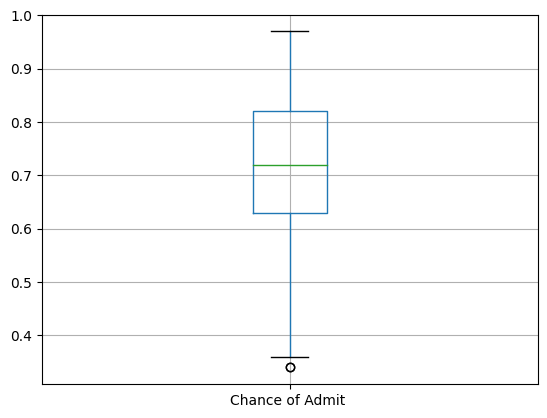

In [12]:
df.boxplot(column=["Chance of Admit "])

<Axes: >

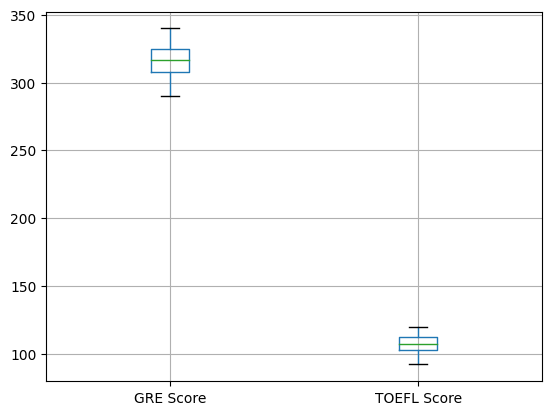

In [13]:
df.boxplot(column=["GRE Score", "TOEFL Score"])

<Axes: >

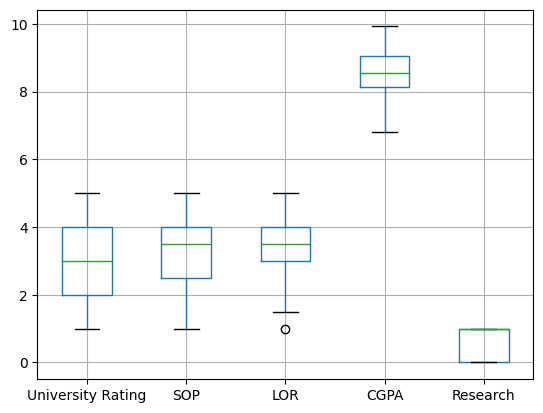

In [14]:
df.boxplot(column=["University Rating","SOP","LOR","CGPA","Research"])

# Removing Outliers using IQR method

In [15]:
df1 = df.copy()

In [16]:
# Calculating Quartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [17]:
# Identifying Outliers
df_out1 = df1[((df1<(Q1 - 1.5*IQR)) | (df1>(Q3+1.5*IQR))).any(axis=1)]
df_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [18]:
# removing outliers
df_out = df1[~(((df1<(Q1 - 1.5*IQR)) | (df1>(Q3+1.5*IQR))).any(axis=1))]
df = df_out.copy()
print(df.shape)

(497, 8)


# Graphical Representation of data

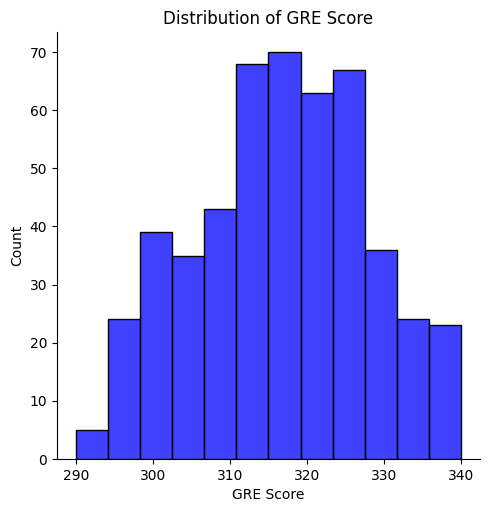

In [19]:
# Showing GRE score
fig = sns.displot(df["GRE Score"], color = "Blue")
plt.title("Distribution of GRE Score")
plt.show()

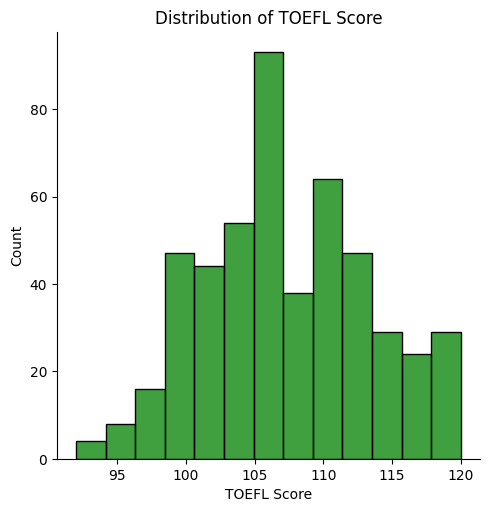

In [20]:
# Showing TOFEL score
fig = sns.displot(df["TOEFL Score"] , color = "GREEN")
plt.title("Distribution of TOEFL Score")
plt.show()

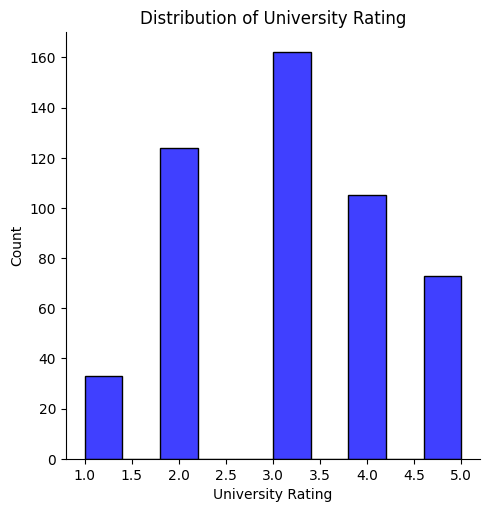

In [21]:
# Showing University Rating
fig = sns.displot(df["University Rating"] ,color = "Blue")
plt.title("Distribution of University Rating")
plt.show()

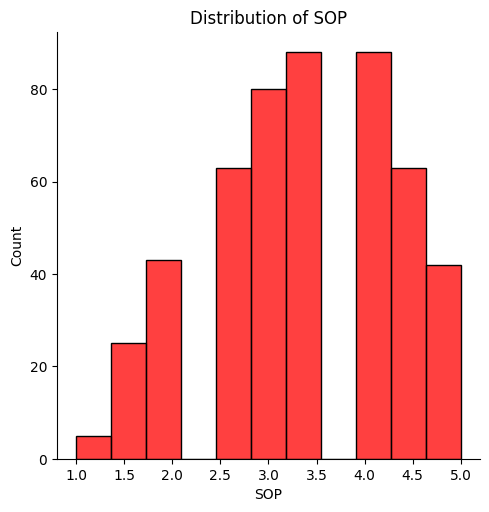

In [22]:
# Showing SOP
fig = sns.displot(df["SOP"] ,color = "RED")
plt.title("Distribution of SOP")
plt.show()

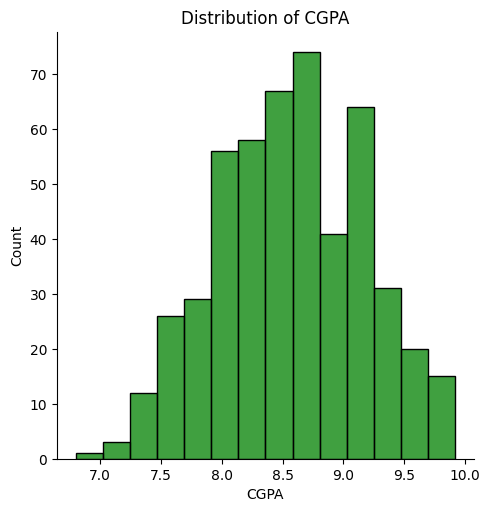

In [23]:
# Showing CGPA
fig = sns.displot(df["CGPA"] ,color = "GREEN")
plt.title("Distribution of CGPA")
plt.show()

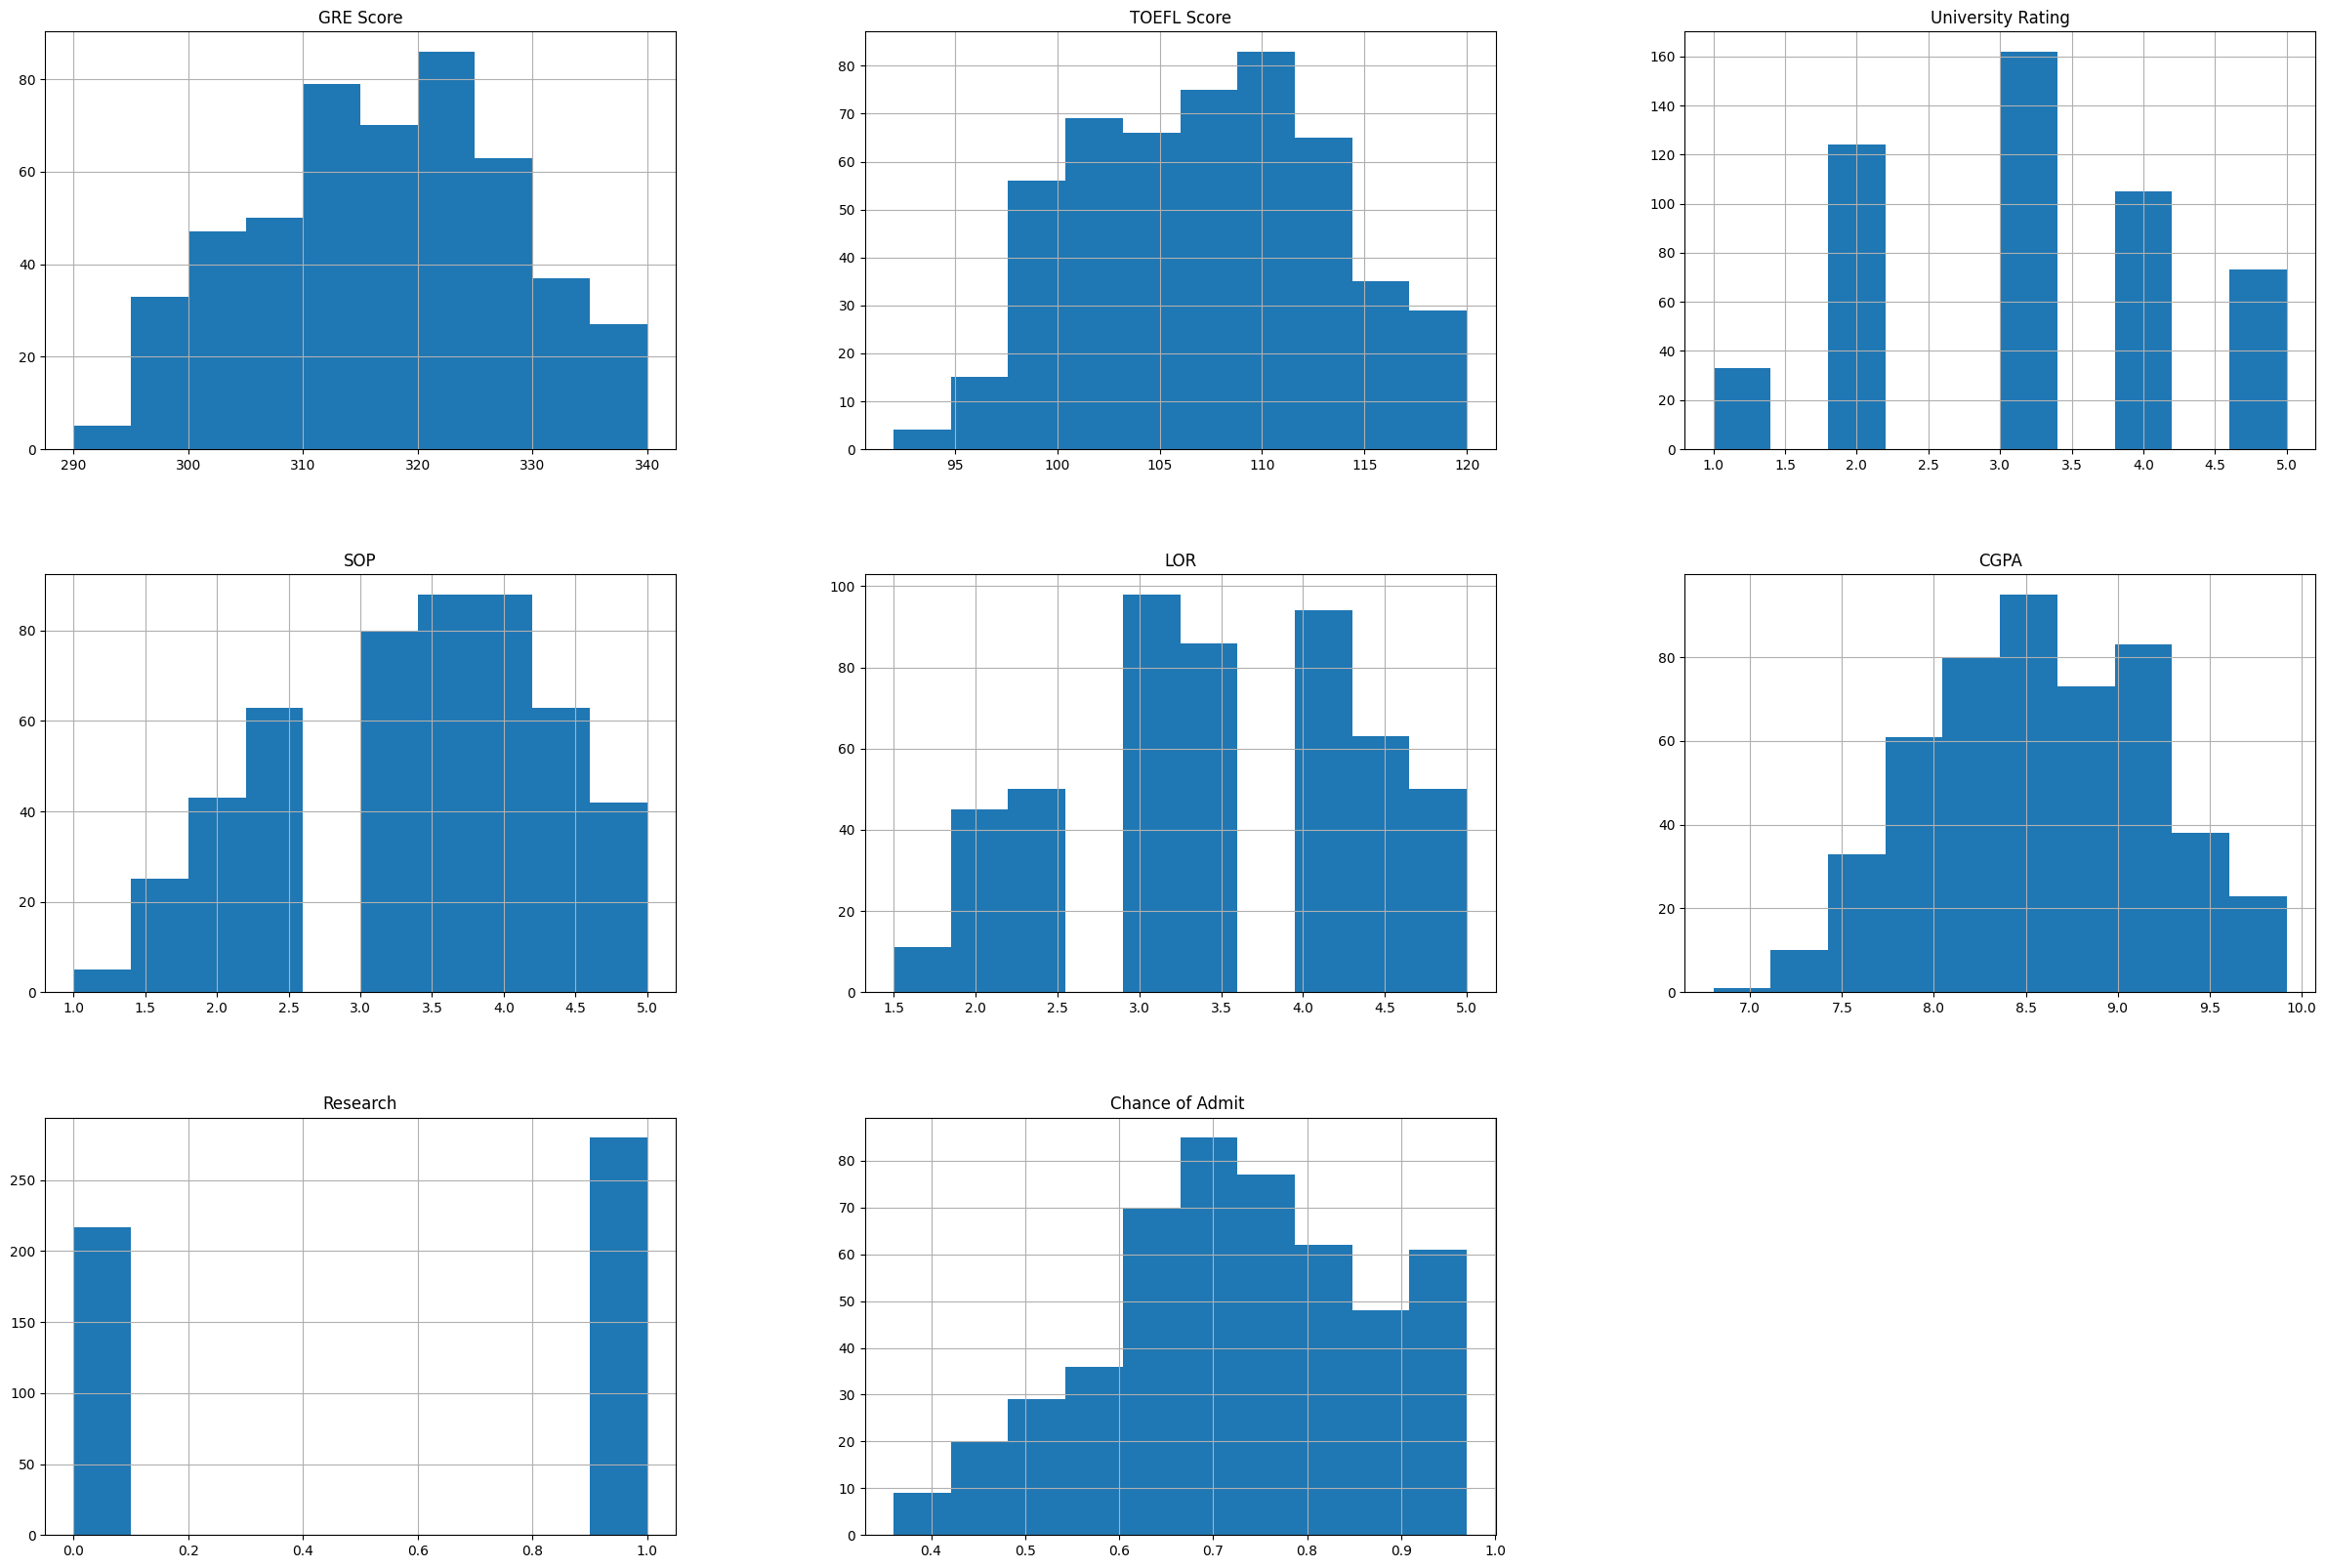

In [24]:
df.hist(figsize= (30,20))
plt.show()

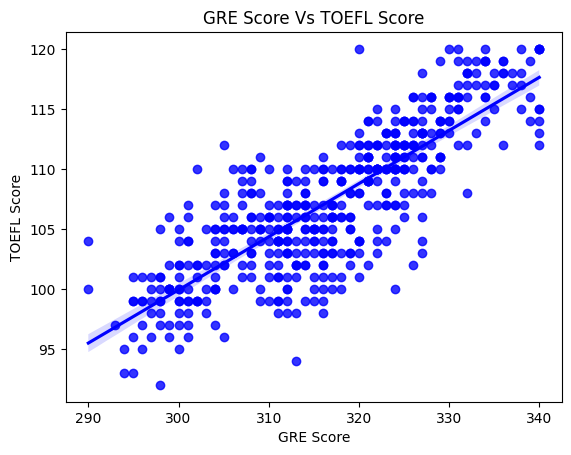

In [25]:
fig = sns.regplot(x = "GRE Score", y = "TOEFL Score",  data = df , color = "Blue")
plt.title("GRE Score Vs TOEFL Score")
plt.show()

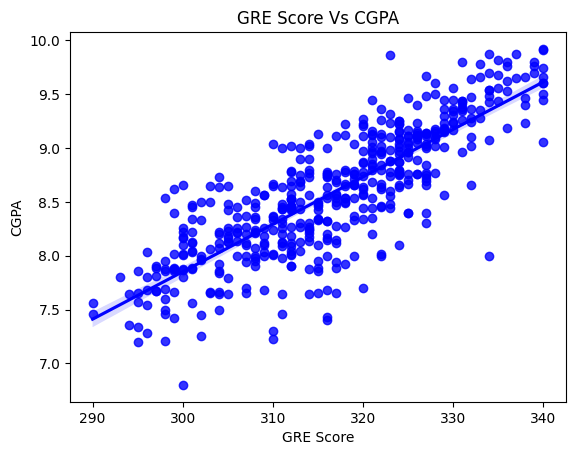

In [26]:
fig = sns.regplot(x = "GRE Score", y = "CGPA",  data = df , color = "Blue")
plt.title("GRE Score Vs CGPA")
plt.show()

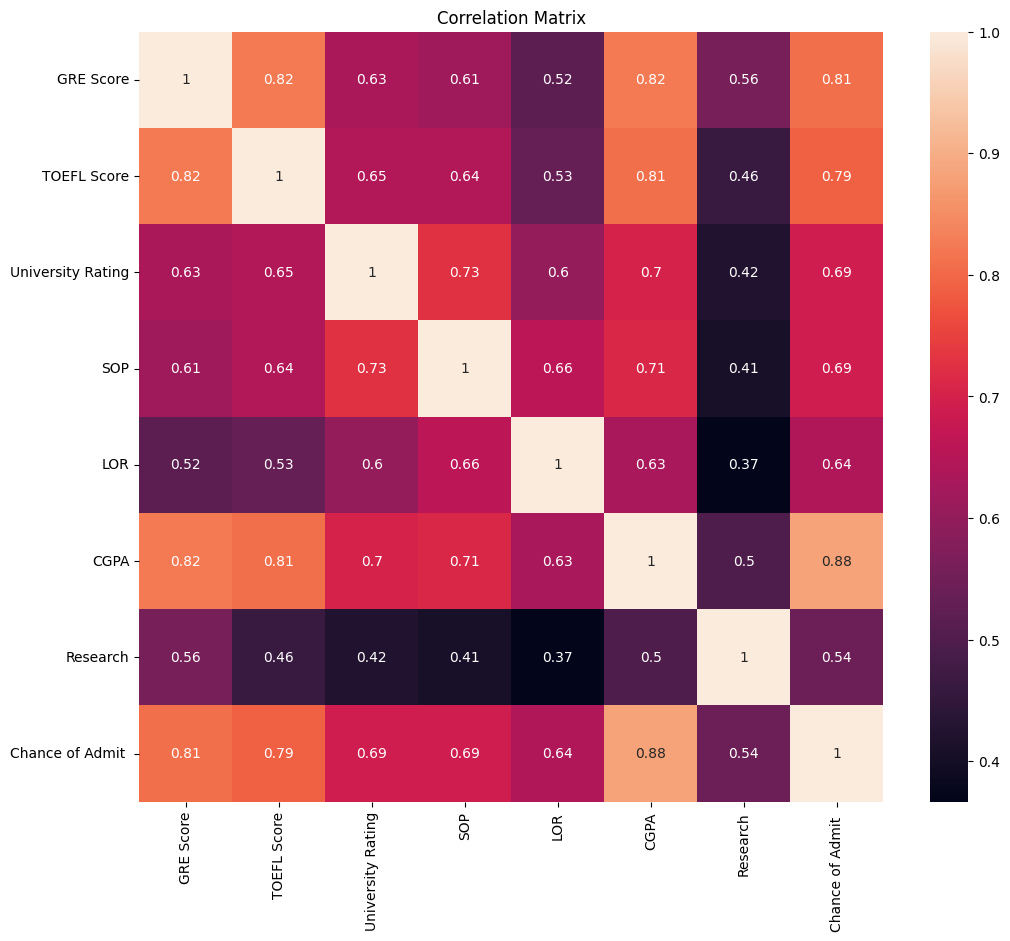

In [27]:
plt.figure(figsize=(12,10))
# To visualize correlation between variables create heatmap
sns.heatmap(df.corr(), annot= True)
plt.title("Correlation Matrix")
plt.show()

# Implementation of Regression Model for Admission Prediction

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# splitting the data
x = df.drop("Chance of Admit ", axis =1)
y = df["Chance of Admit "]

In [30]:
#  converting the continuous values into discreate classes
y_class = (y>0.5).astype(int)

In [31]:
# splitting into traning and testing data
x_train, x_test, y_train , y_test = train_test_split(x, y_class, test_size = 0.2 , random_state= 42)

In [32]:
# Training the model
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
# model testing and evaluation
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)

print(f"Accuracy : {accuracy}")
print(f"classification Report :- \n{report}")

Accuracy : 0.93
classification Report :- 
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.94      0.99      0.96        90

    accuracy                           0.93       100
   macro avg       0.87      0.69      0.75       100
weighted avg       0.92      0.93      0.92       100



# Predicting New Data

In [34]:
new_data = pd.DataFrame( {
    "GRE Score" : [180],
    "TOEFL Score" : [130],
    "University Rating" : [3.7],
    "SOP" : [4.1],
    "LOR" : [4.2],
    "CGPA" : [8.7],
    "Research" : [0]
})

chance_of_admit = model.predict(new_data)
print(f"Chnace of Admit : {chance_of_admit}")

Chnace of Admit : [1]


**The classification model predicts the probabilty of admission based on give input.**
**If the predicted value is 1 then there is high chance of admission.**
**And if it is 0 then there is low chance of admission.**
**However the model's prediction should be interpreted as probability rather than definitive outcome.**
